In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Import data and train model

In [5]:
from mnist import MNIST

mnist = MNIST('MNIST')

x_train, y_train = mnist.load_training() # 60000 samples
x_test, y_test = mnist.load_testing() # 10000 samples

# Convert to ndarrays and enforce type
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.int32)

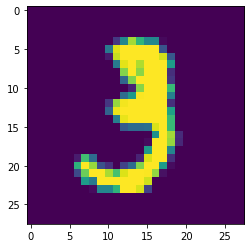

In [6]:
plt.imshow(x_train[10].reshape(28, 28));

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

### Evaluate model

In [8]:
y_pred = knn.predict(x_test[:1000])

In [10]:
y_pred[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

In [11]:
y_test[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

Actual number: 4 
Predicted number: 0


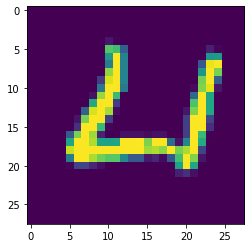

Actual number: 2 
Predicted number: 1


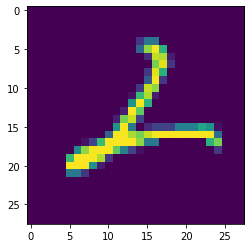

Actual number: 8 
Predicted number: 2


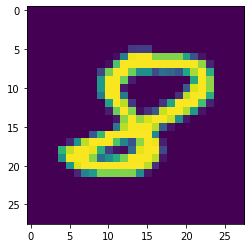

Actual number: 2 
Predicted number: 7


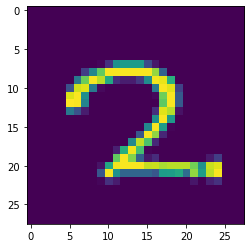

Actual number: 4 
Predicted number: 9


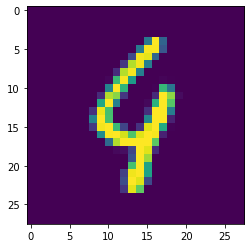

Actual number: 3 
Predicted number: 1


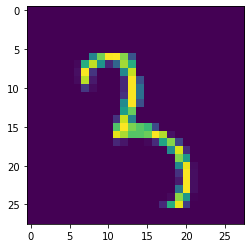

In [12]:
bins = [1 if i == j else 0 for i, j in zip(y_pred, y_test[:1000])]
fail_idxs = [i for i in range(len(bins)) if bins[i] == 0]
max_n = 5

# 1b
for n, idx in enumerate(fail_idxs):
    print('Actual number:', y_test[idx], '\nPredicted number:', y_pred[idx])
    plt.imshow(x_test[idx].reshape(28, 28))
    plt.show()
    if n >= max_n:
        break

#### Confusion matrix

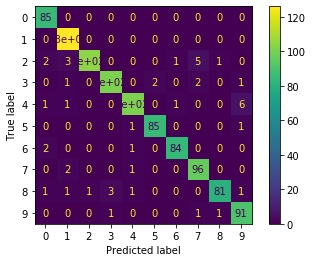

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(
    knn, x_test[:1000], y_test[:1000], 
    display_labels=[i for i in range(10)],
    normalize=None
);

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test[:1000], y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        85
           1       0.94      1.00      0.97       126
           2       0.99      0.90      0.94       116
           3       0.96      0.94      0.95       107
           4       0.96      0.92      0.94       110
           5       0.98      0.98      0.98        87
           6       0.98      0.97      0.97        87
           7       0.92      0.97      0.95        99
           8       0.98      0.91      0.94        89
           9       0.91      0.97      0.94        94

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.96      0.95      0.95      1000



### Exercise 2

In [15]:
def get_class_members(y, x):
    class_members = {}
    # Initialize class member vector lists
    for class_ in np.unique(np.array(y_test)):
        class_members[class_] = []
    # Put vectors in corresponding baskets
    for class_, vector in zip(y, x):
        class_members[class_].append(vector)
    return class_members


import time


times = []
for i in range(10):
    t0 = time.time()
    class_members = get_class_members(y_test, x_test)
    times.append(time.time() - t0)
print(np.mean(np.array(times)))

0.013791394233703614


In [17]:
from sklearn.cluster import KMeans
from tqdm import tqdm


def get_template_class_members(class_members, n_templates=64, show_progress=True):
    kmeans = KMeans(n_clusters=n_templates, verbose=1, n_jobs=-1)
    # Wrap iterator in tqdm progress indicator
    if show_progress:
        class_items = tqdm(class_members.items())
    else:
        class_items = class_members.items()
    # Cluster classes into fewer template classes
    template_class_members = {}
    for class_, members in class_items:
        class_kmeans = kmeans.fit(members)
        template_vectors = class_kmeans.cluster_centers_
        template_class_members[class_] = template_vectors
    return template_class_members


template_class_members = get_template_class_members(class_members)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:46<00:00, 10.66s/it]


In [18]:
template_x, template_y = [], []
for class_, template_vectors in template_class_members.items():
    template_y.extend([class_]*len(template_vectors))
    template_x.extend(template_vectors)

#### Train the KNN with the template classes  
Notice greatly reduced training time  
Measure accuracy loss

In [20]:
small_knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1, metric='euclidean')
small_knn.fit(template_x, template_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')